# 1. Digital Signal Processing (DSP) - Aliasing
_author: Maurice Snoeren_ <br>
_date: 10-04-2021_

This Jupyter notebook is used to practice with the DSP theory in software .Within this course we take time serie signals and perform linear time invariant filtering.

## Sampling real signals
We know now to transfer analog signals to the digital domain using sampling. But do we know how to choose the correct sampling frequency? Support we take the samen analog signal $f(t)$ as last time:

$f(t) = ASin(2{\pi}ft + \phi) + b$


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# To be sampled analog signal
A   = 1 # The amplitude
b   = A # The y-axis displacement
f   = 1 #Hz - Frequency of the analog signal
phi = 0 # Phase shift of the analog signal
ts  = 2*1/f # total time to show
dt  = 0.01 # Show analog signal in this time interval

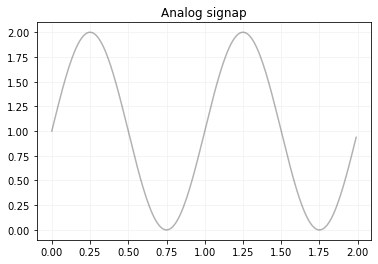

In [7]:
def analog_signal(t, A, b, f, phi):
    return A * np.sin(2 * np.pi * f * t + phi) + b

t1 = []
y1 = []
for x1 in range(int(ts/dt)):
    t1.append(x1*dt)
    y1.append(analog_signal(t1[x1], A,b, f, phi))
    
plt.plot(t1,  y1, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('Analog signap')
plt.show()

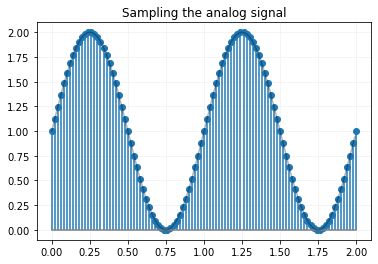

In [8]:
f_s = 50 #Hz - Sampling frequency

t3 = []
y3 = []

for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t3.append(x1/f_s)
    y3.append(analog_signal(t3[x1], A,b, f, phi))
    
plt.stem(t3, y3, '.-', basefmt="gray", use_line_collection=True)
plt.plot(t1,  y1, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('To high sampling interval?')
plt.show()

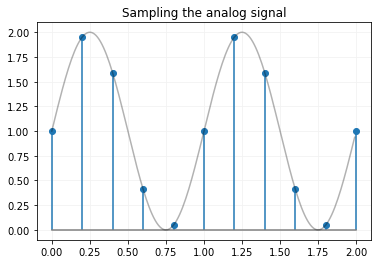

In [9]:
f_s = 5 #Hz - Sampling frequency

t3 = []
y3 = []

for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t3.append(x1/f_s)
    y3.append(analog_signal(t3[x1], A,b, f, phi))
    
plt.stem(t3, y3, '.-', basefmt="gray", use_line_collection=True)
plt.plot(t1,  y1, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('Looks good sampling interval?')
plt.show()


It looks like we are able to retrieve the orignal signal back to the real signal from the digital samples. What happend we we really sample much lower?

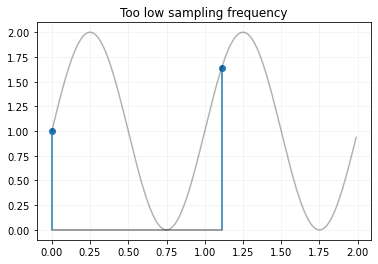

In [10]:
f_s = 0.9 #Hz - Sampling frequency

t3 = []
y3 = []

for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t3.append(x1/f_s)
    y3.append(analog_signal(t3[x1], A,b, f, phi))
    
plt.stem(t3, y3, '.-', basefmt="gray", use_line_collection=True)
plt.plot(t1,  y1, color='black', alpha=0.3)

plt.grid(color='0.95')
plt.title('Too low sampling frequency?')
plt.show()

As we can see, this is too low. We cannot retrieve the original signal from these samples! When we enlarge this figure to 20 seconds, we can see something interesting here...

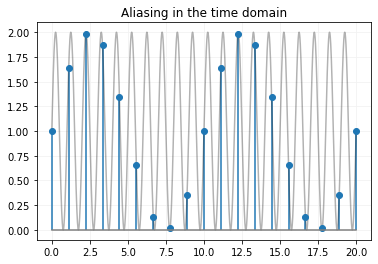

In [11]:
ts  = 20 # total time to show

f_s = 0.9 #Hz - Sampling frequency

t4 = []
y4 = []
t5 = []
y5 = []

# Calculate the orginal signal
for x1 in range(int(ts/dt +1/f)):
    t4.append(x1*dt)
    y4.append(analog_signal(t4[x1], A,b, f, phi))

# Calculate the sampled signal
for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t5.append(x1/f_s)
    y5.append(analog_signal(t5[x1], A,b, f, phi))
    
plt.plot(t4,  y4, color='black', alpha=0.3)
plt.stem(t5, y5, '.-', basefmt="gray", use_line_collection=True)

plt.grid(color='0.95')
plt.title('Aliasing in the time domain')
plt.show()


If we translate the samples back, we get a different frequency?! A lower frequency than the original analog signal. This is called aliasing. If this happens, it is not possible to recover the original signal.

## What is the correct sampling frequency?

In the 1940s a paper is published by Shannon and Nyquist that proposed the sampling theorem. The sampling theorem indicates that a continous signal can be properly sampled, only is it does not contain frequency components above the half of the sampling rate. The nyquist frequency $f_n$ is equal to the half of the samplinf frequency $f_s$. This nyquist frequency shows the maximal frequency the a signal can contain.

$ f_s = 2 * f_{max} $

$ f_n >= \frac{1}{2} f_s $

In our example, the maximum frequency in the signal (and the only frequency in the signal!) is 1 Hz. Therefore the sampling frequency should be at least 2 Hz. The anti-aliasing filter makes sure that all frequencies above the 1 Hz (the nyquist frequency) are filtered out! Lets show this.

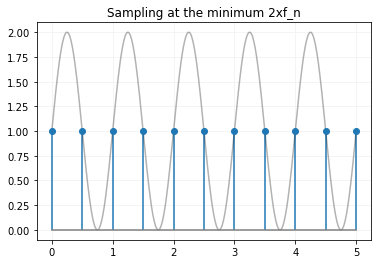

In [65]:
ts  = 5 # total time to show

f_s = 2*f #1 Hz - Sampling frequency

t4 = []
y4 = []
t5 = []
y5 = []

# Calculate the orginal signal
for x1 in range(int(ts/dt +1/f)):
    t4.append(x1*dt)
    y4.append(analog_signal(t4[x1], A,b, f, phi))

# Calculate the sampled signal
for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t5.append(x1/f_s)
    y5.append(analog_signal(t5[x1], A,b, f, phi))
    
plt.plot(t4,  y4, color='black', alpha=0.3)
plt.stem(t5, y5, '.-', basefmt="gray", use_line_collection=True)

plt.grid(color='0.95')
plt.title('Sampling at the minimum 2xf_n')
plt.show()

The signal is recoverable, but we see that all the values are the same. Most of the time, we choose a bit larger, to make sure we really are able to recover the signal from the samples. Lets see.

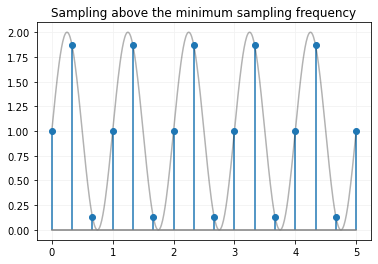

In [66]:
f_s = 3*f #1 Hz - Sampling frequency

t4 = []
y4 = []
t5 = []
y5 = []

# Calculate the orginal signal
for x1 in range(int(ts/dt +1/f)):
    t4.append(x1*dt)
    y4.append(analog_signal(t4[x1], A,b, f, phi))

# Calculate the sampled signal
for x1 in range(int(f_s*ts+1/f)): # The 1/f to get the last sample of the analog signal
    t5.append(x1/f_s)
    y5.append(analog_signal(t5[x1], A,b, f, phi))
    
plt.plot(t4,  y4, color='black', alpha=0.3)
plt.stem(t5, y5, '.-', basefmt="gray", use_line_collection=True)

plt.grid(color='0.95')
plt.title('Sampling above the minimum sampling frequency')
plt.show()

## What about frequencies?!

We talk about frequencies and the analog signal only contains one frequency? What is this?! As you may know that true colors of light can be described by three main colors, namely red, green and blue (RGB). Your television has pixels that have these three colors.

For continous time signals, we are able to describe these signals by frequency components of sines and cosines. Fourier was busy with solving problems of thermal dynamics using mathematical series. He showed that periodical signals can be described by a sum of weigthed harmonics of sine functions. Furtermore, he showed that also for non periodic signals it is possible to describe with non harmonic sine functions. This is the basis of the Fouries series and Fourier transform. Transforming time serie to the frequency domain.

## Periodical signals

When a signal is strict periodical, then there exist a harmonic correlation between the freqeuncy components. This is the fourier series:

$ x(t) = a_0 + a_1Cos(2\pi{t) + b_1Sin(t) + a_2Cos(2t) + b_2Sin(2t) + a_3Cos(3t) + b_3Sin(3t) + ... $

$ x(t) = \frac{1}{2} a_0 + \sum\limits_{k=0}^{\infty}{a_k Cos(kw_0t) + b_k Sin(kw_0t)} $

The coefficient $a_k$ and $b_k$ can be calculated as follows

$ a_k = \frac{2}{T}\int_{\frac{-T}{2}}^{\frac{T}{2}}{x(t) Cos(kw_0t)dt} $

$ b_k = \frac{2}{T}\int_{\frac{-T}{2}}^{\frac{T}{2}}{x(t) Sin(kw_0t)dt} $

This look very complex, but if you look closer it is not that difficult to understand. Put your math's hat on! The fourier serie $x(t)$ shows how much sines and cosines are in the signal. How much is represented by $a_k$ and $b_k$. So, if we have to sines within our signal, than the $a_k$ will be all zero and only two $b_k$'s are non zero. That is the easy part!

If we look closer to the $a_k$ equation, then we integrate the continuous time serie multiplied by a sine on a specific frequency, namely $kw_0$. If the $x(t)$ correlates a lot with $Sin(kw_0t)$, than the result will be big. Otherwise the value of $a_k$ will be small. So, using the integral function, we are able to get a value that represent how much the sine (or cosine) is represented in the continous periodical signal $x(t)$.

Example of a signal that we all are very familiar with; a clock signal! See how we can describe it by its frequencies.

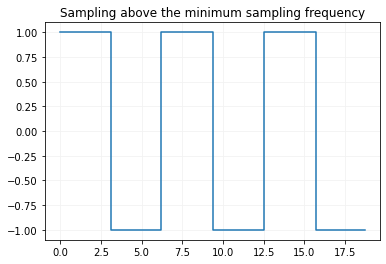

In [76]:
def clock_signal(t, A, T):
    if (t % (2*np.pi) < np.pi):
        return A
    else:
        return -A

T = 2*np.pi
A = 1
dt = 0.1
t = []
x = []
for x1 in range(int(3*T/dt)):
    t.append(x1*dt)
    x.append(clock_signal(t[x1], A, T))
    
plt.step(t, x)

plt.grid(color='0.95')
plt.title('Sampling above the minimum sampling frequency')
plt.show()

Using the Fourier equation, we get the following:

$ a_0 = 0 $

$ a_k = 0 $

$ b_k = \frac{2}{k\pi} $

What is $w_0$?

$ T = 2\pi $

$ w_0 = 2\pi{f_0} = \frac{2\pi}{T} = \frac{2\pi}{2\pi} = 1 $

So, the Fourier serie for this periodical continous signal is

$ x(t) = \sum\limits_{k=0}^{\infty}{\frac{2}{k\pi} (1-(-1)^k) Sin(kt)} $

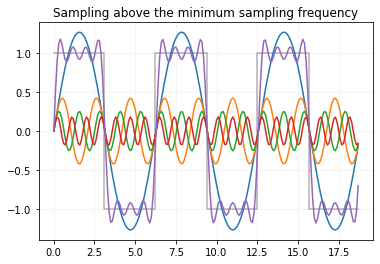

In [101]:
def fourier_serie(k, t):
    return (2/(k*np.pi))*(1-(-1)**k)*np.sin(k*t)

T = 2*np.pi
A = 1
dt = 0.1
t = []
x = []
fs1 = []
fs2 = []
fs3 = []
fs4 = []
fs  = []
for x1 in range(int(3*T/dt)):
    t.append(x1*dt)
    x.append(clock_signal(t[x1], A, T))
    fs1.append(fourier_serie(1, t[x1]))
    fs2.append(fourier_serie(3, t[x1]))
    fs3.append(fourier_serie(5, t[x1]))
    fs4.append(fourier_serie(7, t[x1]))
    fs.append(fs1[x1] + fs2[x1] + fs3[x1] + fs4[x1])
    
plt.step(t, x, color='black', alpha=0.3)
plt.plot(t,  fs1)
plt.plot(t,  fs2)
plt.plot(t,  fs3)
plt.plot(t,  fs4)
plt.plot(t,  fs)

plt.grid(color='0.95')
plt.title('Sampling above the minimum sampling frequency')
plt.show()

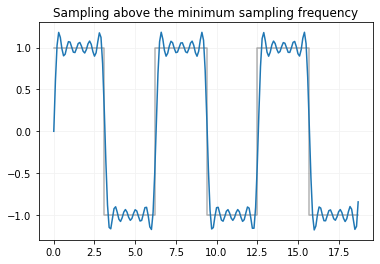

In [103]:
def fourier_series(k_total, t):
    sum = 0
    for k in range(1, k_total+1):
        sum = sum + (2/(k*np.pi))*(1-(-1)**k)*np.sin(k*t)
    return sum
        
    
T = 2*np.pi
A = 1
dt = 0.1
t = []
x = []
fs  = []
for x1 in range(int(3*T/dt)):
    t.append(x1*dt)
    x.append(clock_signal(t[x1], A, T))
    fs.append(fourier_series(10, t[x1]))
    
plt.step(t, x, color='black', alpha=0.3)
plt.plot(t,  fs)

plt.grid(color='0.95')
plt.title('Sampling above the minimum sampling frequency')
plt.show()

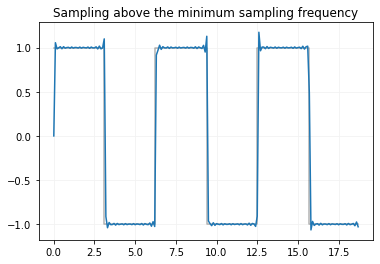

In [104]:
t = []
x = []
fs  = []
for x1 in range(int(3*T/dt)):
    t.append(x1*dt)
    x.append(clock_signal(t[x1], A, T))
    fs.append(fourier_series(100, t[x1]))
    
plt.step(t, x, color='black', alpha=0.3)
plt.plot(t,  fs)

plt.grid(color='0.95')
plt.title('Sampling above the minimum sampling frequency')
plt.show()

## Frequency spectrum of a signal

<< eenvoudige plaatjes waarin we ook de Fn en Fs neerzetten. >>

## Vragen

V. Zoek uit op welke manier audio van een cd is gesampled. Klopt dat volgens de Shannon sampling theorie?

V. Reken zelf de a_k en b_k uit van bovenstaande signaal!

## Van analoog naar digitaal voorbeeld

In [32]:
A = 2
b = 2
f = 10
fs = 100
Ts = 1/fs
KN = 2**12 - 1
Vkn = 5/KN

print(KN)
print(0.5*5/4095)

for n in range(10):
    print("f(" + str(n) + "T) = " + str(A*np.cos(2*np.pi*f*n*Ts)+b))
    print("f[" + str(n) + "] = " + str((A*np.cos(2*np.pi*f*n*Ts)+b)/Vkn))
    
    
print(5/(2**12-1))

4095
0.0006105006105006105
f(0T) = 4.0
f[0] = 3276.0
f(1T) = 3.618033988749895
f[1] = 2963.169836786164
f(2T) = 2.618033988749895
f[2] = 2144.169836786164
f(3T) = 1.3819660112501053
f[3] = 1131.8301632138362
f(4T) = 0.3819660112501053
f[4] = 312.8301632138363
f(5T) = 0.0
f[5] = 0.0
f(6T) = 0.3819660112501051
f[6] = 312.8301632138361
f(7T) = 1.3819660112501049
f[7] = 1131.830163213836
f(8T) = 2.6180339887498945
f[8] = 2144.1698367861636
f(9T) = 3.618033988749895
f[9] = 2963.169836786164
0.001221001221001221
